<a href="https://colab.research.google.com/github/pri538/ML-Projects/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.rename(columns = {"cp":"ChestPainType", "trtbps":"RestingBP", "fbs":"FastingBS", "restecg":"RestingECG", "thalachh":"MaxHR", "exng":"ExerciseAngina", "slp":"Slope", "caa":"MajorVessels", "thall":"StressTest"}, inplace=True)
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


In [ ]:
df.head()

,age,sex,ChestPainType,RestingBP,chol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,Slope,MajorVessels,StressTest,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
categoricalCols = ['sex','ChestPainType','ExerciseAngina','Slope','MajorVessels','StressTest']
continuousCols = ["age",'RestingBP','chol', 'FastingBS', 'RestingECG', 'MaxHR','oldpeak']
targetCol = ["output"]
print("The categorial cols are : ", categoricalCols)
print("The continuous cols are : ", continuousCols)
print("The target variable is :  ", targetCol)

The categorial cols are :  ['sex', 'ChestPainType', 'ExerciseAngina', 'Slope', 'MajorVessels', 'StressTest']
The continuous cols are :  ['age', 'RestingBP', 'chol', 'FastingBS', 'RestingECG', 'MaxHR', 'oldpeak']
The target variable is :   ['output']


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


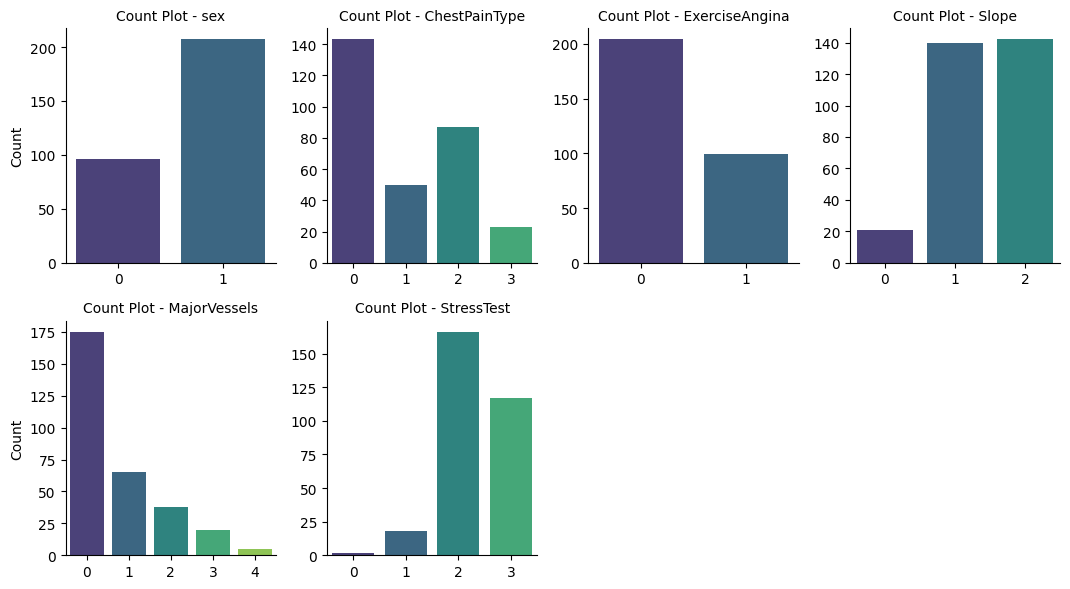

In [ ]:
g = sns.catplot(
    data=df[categoricalCols].melt(),
    x="value",
    col="variable",
    kind="count",
    col_wrap=4,
    palette="viridis",
    height=3,
    aspect=0.9,
    sharex=False,
    sharey=False,
)

# Set titles and labels for each plot
g.set_titles("Count Plot - {col_name}")
g.set_xlabels("")
g.set_ylabels("Count")
plt.tight_layout()
plt.show()

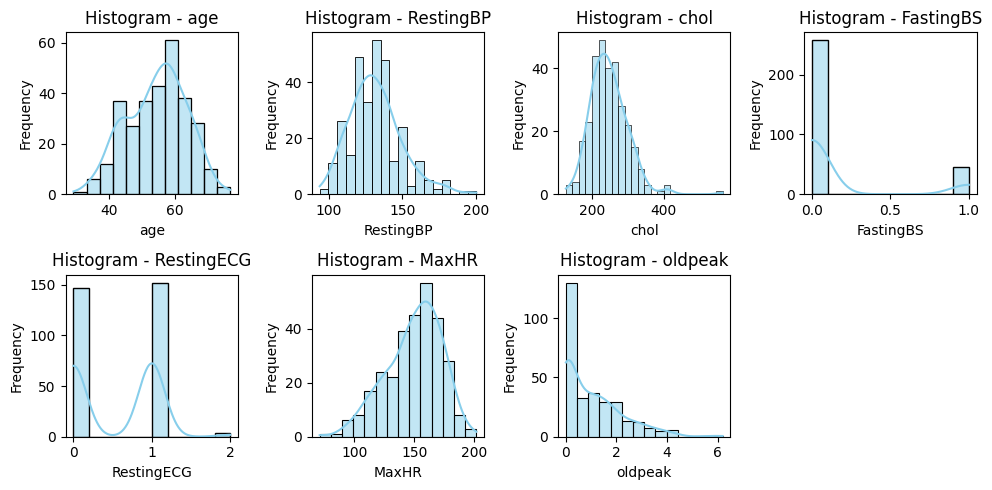

<Figure size 1000x500 with 0 Axes>

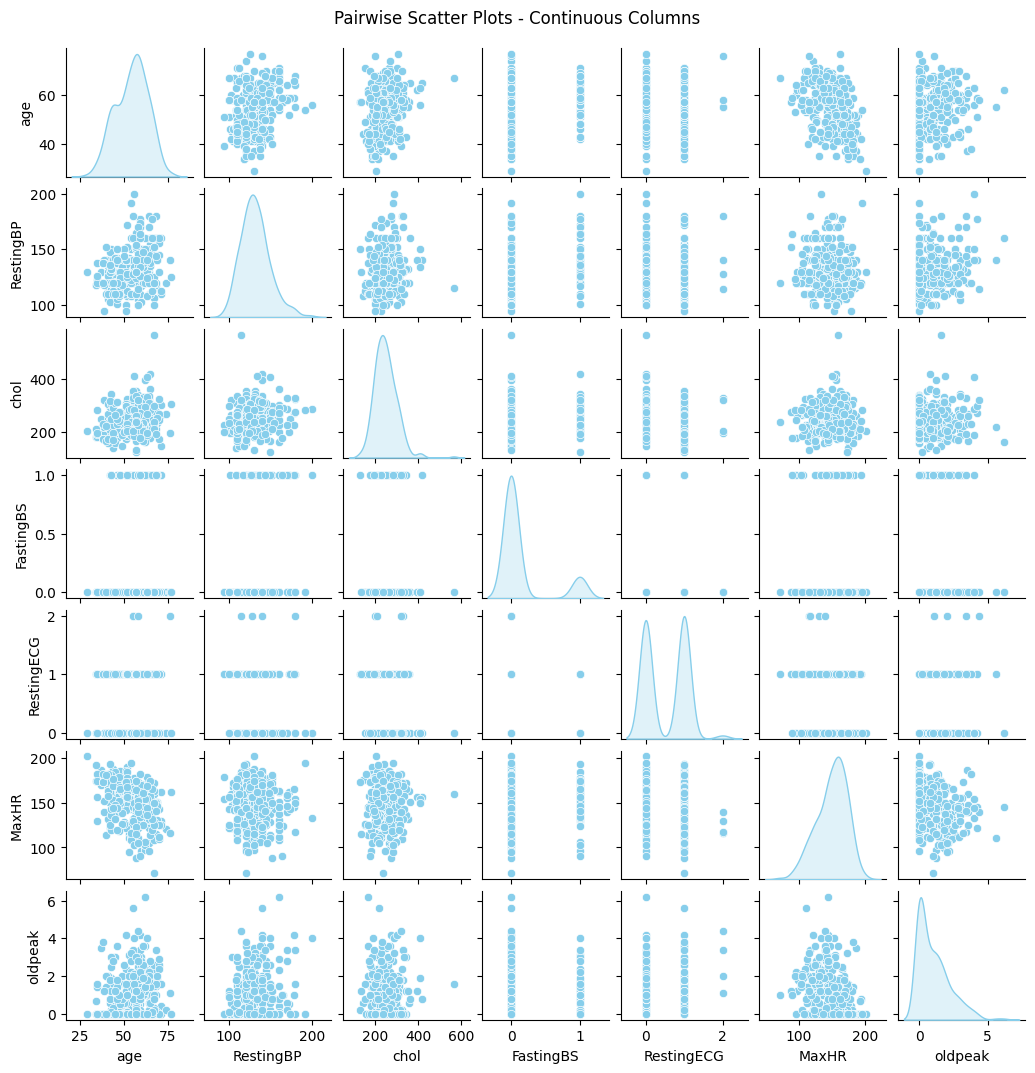

In [ ]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(continuousCols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot scatter plot for pairwise continuous columns
plt.figure(figsize=(10, 5))
sns.pairplot(df[continuousCols], diag_kind="kde", plot_kws={"color": "skyblue"}, diag_kws={"color": "skyblue"}, height=1.5)
plt.suptitle("Pairwise Scatter Plots - Continuous Columns", y=1.02)
plt.show()

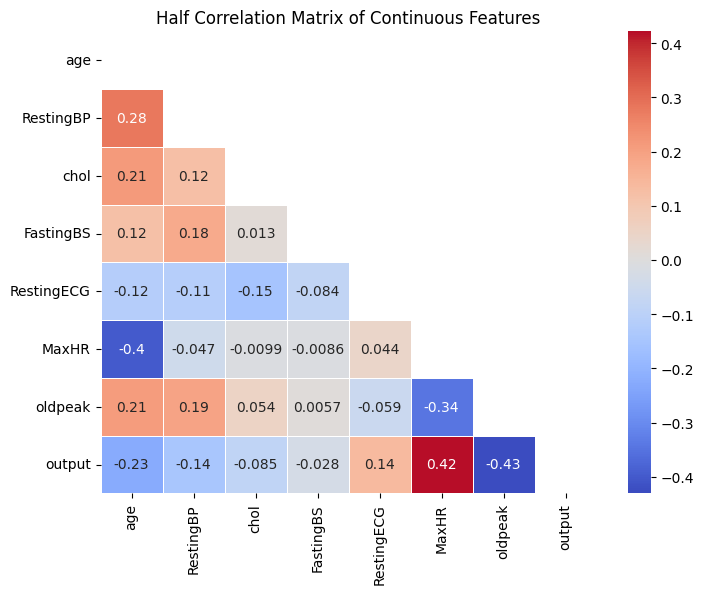

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[continuousCols+ targetCol].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, mask=mask)
plt.title("Half Correlation Matrix of Continuous Features")
plt.show()

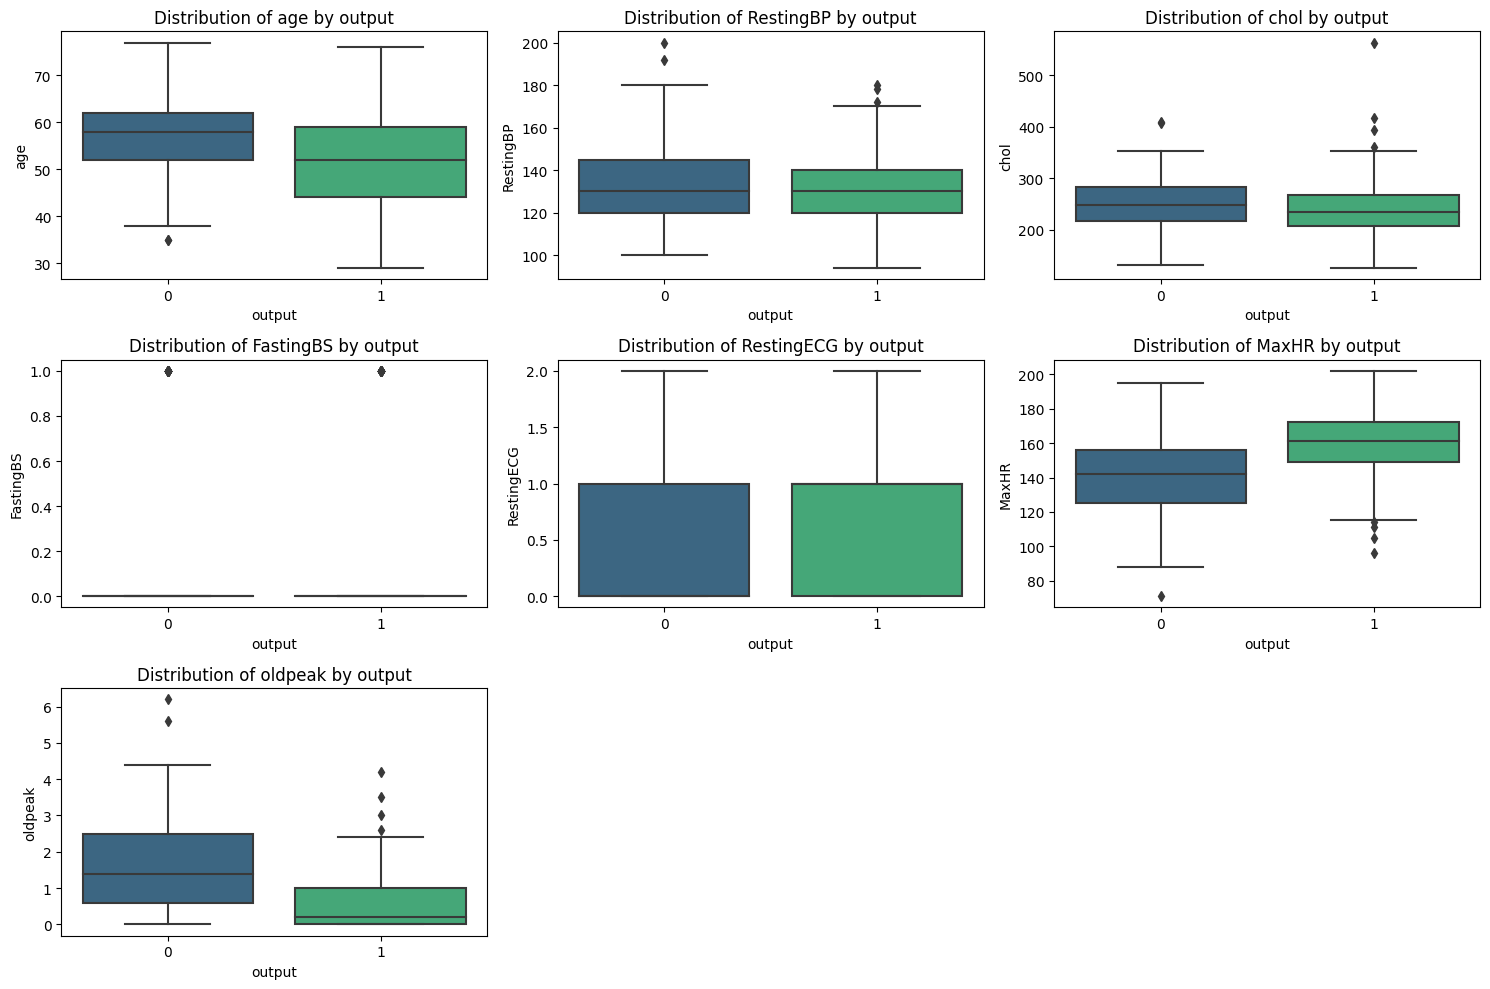

In [ ]:
# Separate continuous data by output
df_cont = df[continuousCols + targetCol].copy()
df_outcome0 = df_cont[df_cont["output"] == 0]
df_outcome1 = df_cont[df_cont["output"] == 1]

# Plot distribution for each column by outcome using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuousCols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="output", y=col, data=df_cont, palette="viridis")
    plt.title(f"Distribution of {col} by output")
    plt.xlabel("output")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

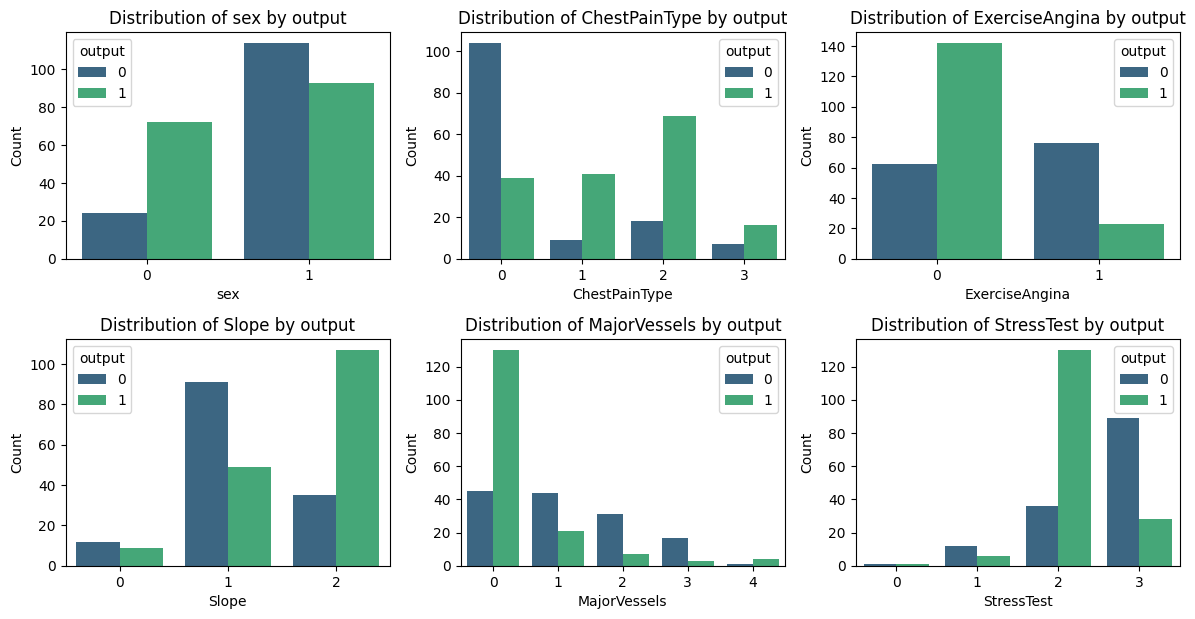

In [ ]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(categoricalCols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=col, hue='output', data=df, palette='viridis')
    plt.title(f'Distribution of {col} by output')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='output', labels=['0', '1'])
plt.tight_layout()
plt.show()

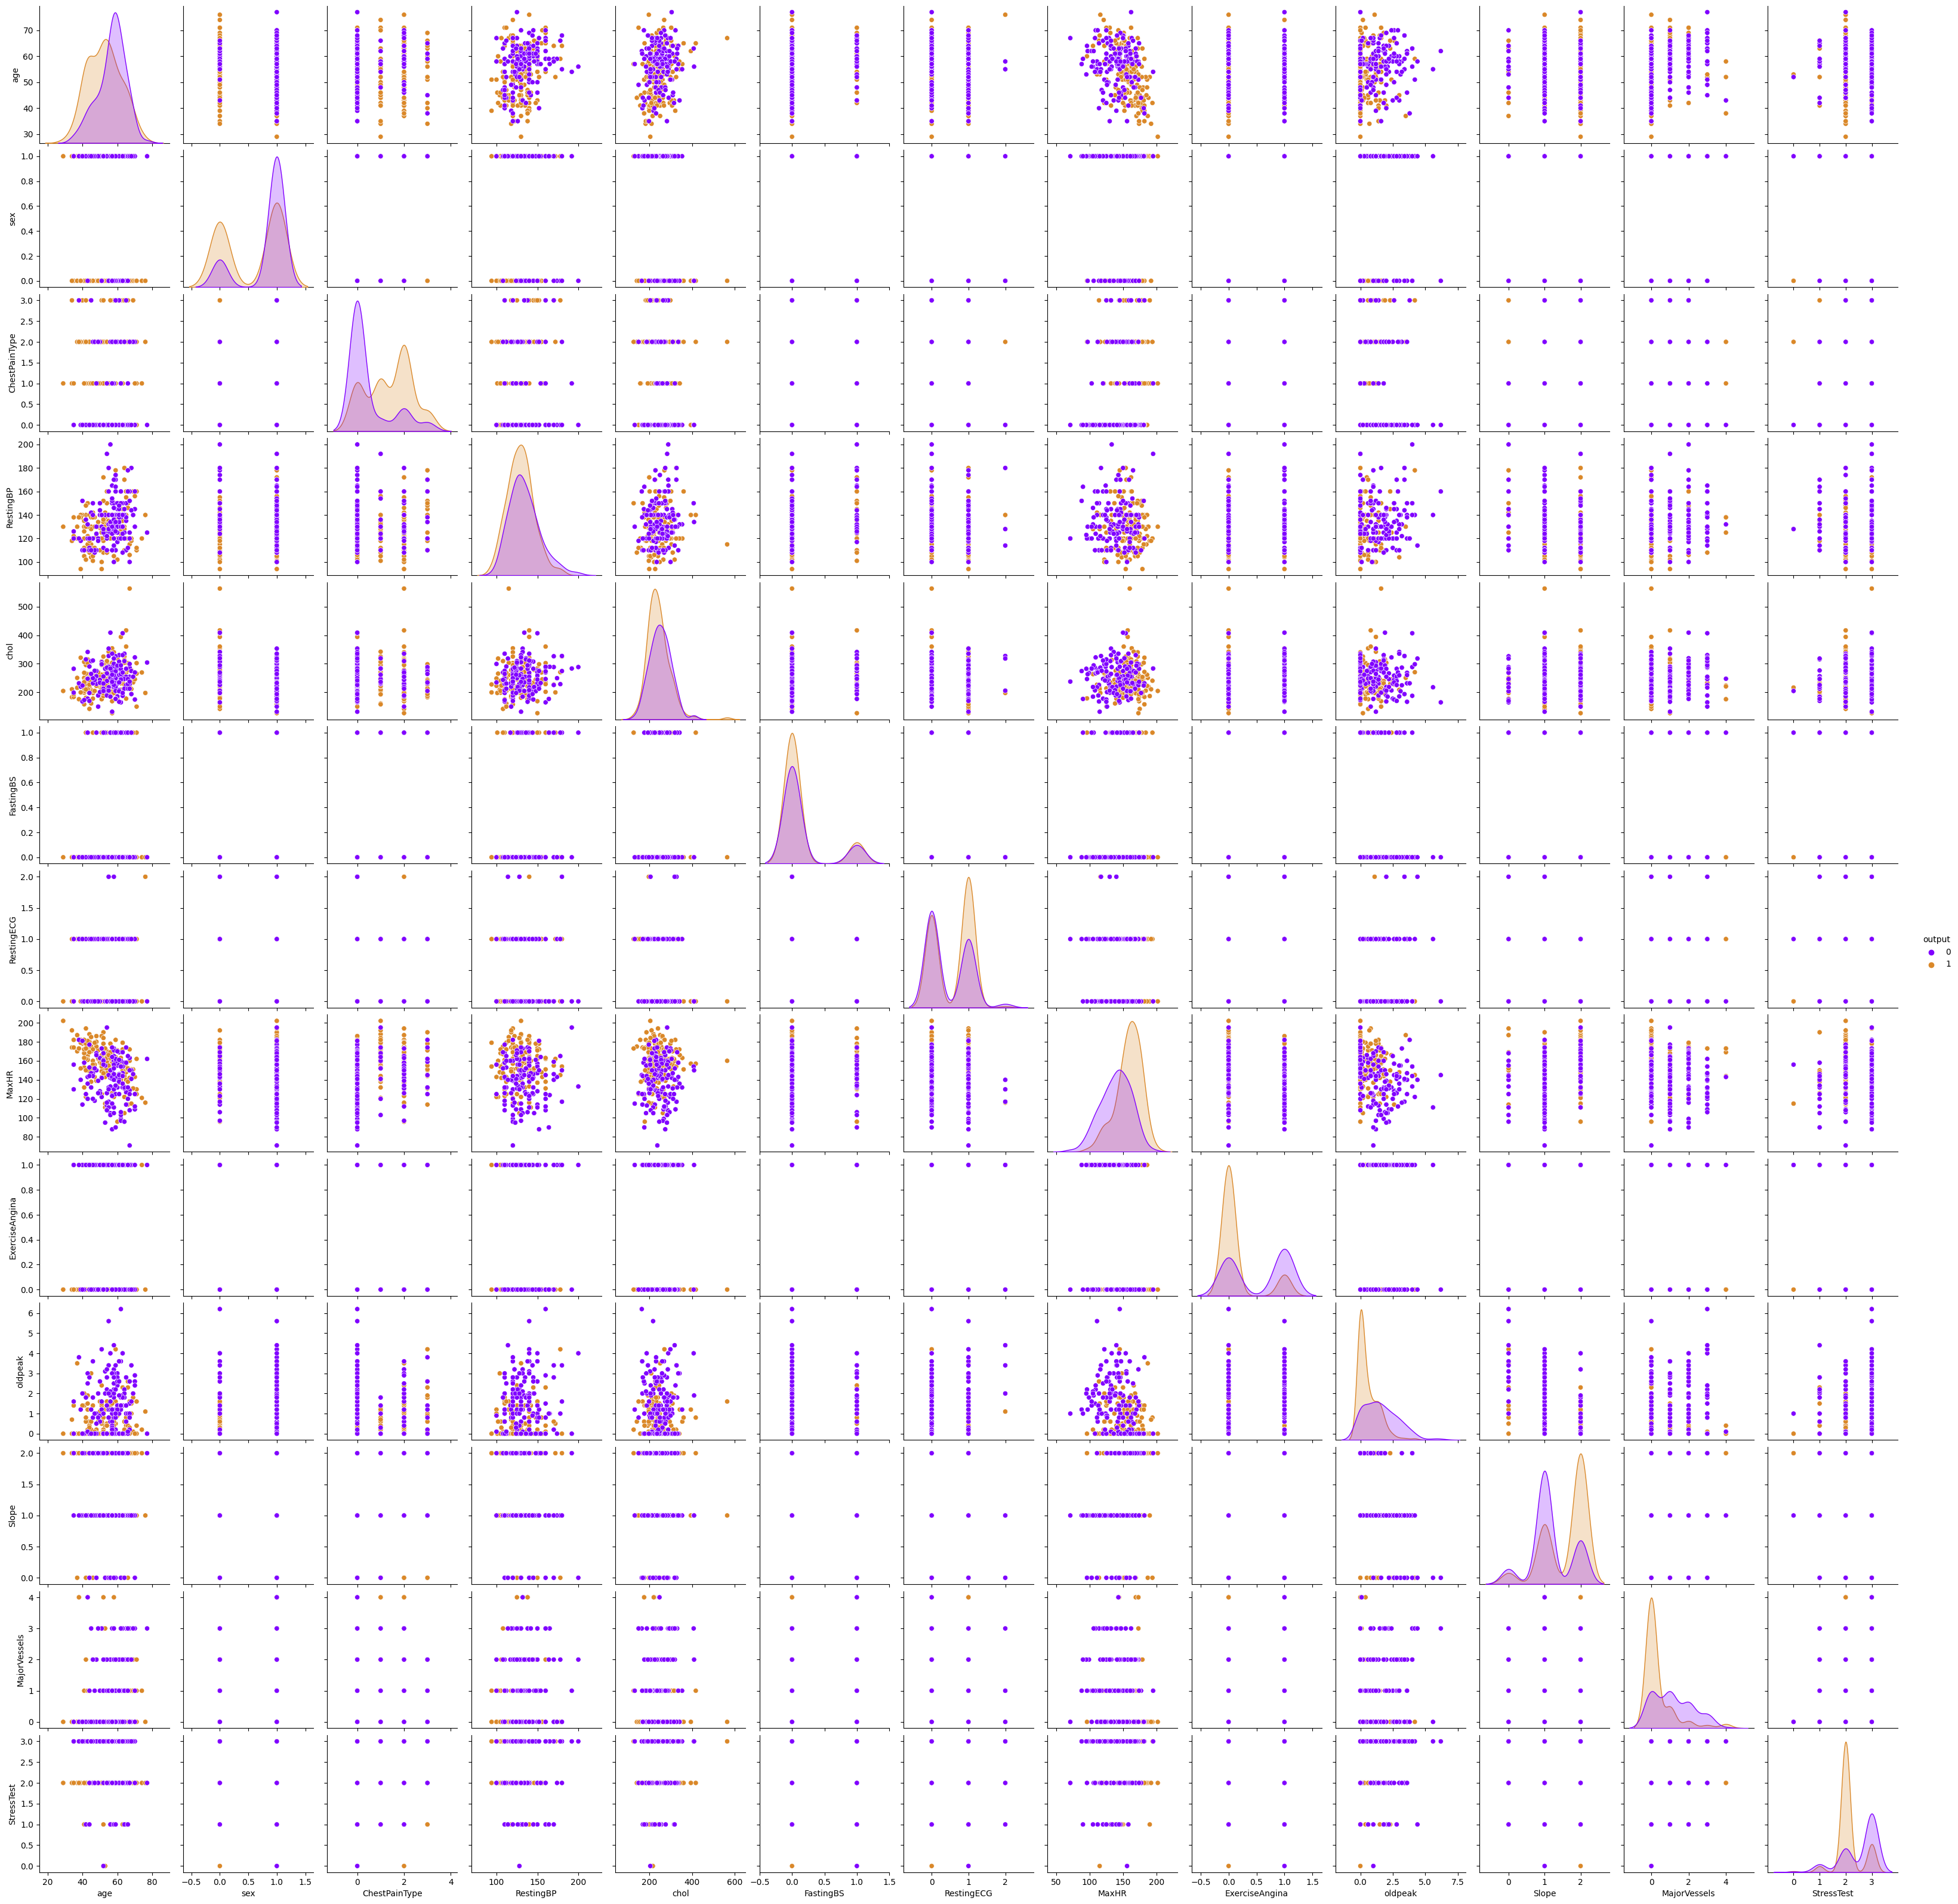

In [ ]:
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

In [ ]:
df.isnull().sum()

age               0
sex               0
ChestPainType     0
RestingBP         0
chol              0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
oldpeak           0
Slope             0
MajorVessels      0
StressTest        0
output            0
dtype: int64

In [ ]:
#defining the features and target
X = df.drop('output', axis=1)  # Drop the target column from features
y = df['output']  #target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (212, 13) (212,)
Shape for testing data (91, 13) (91,)


In [ ]:
# encoding the categorical columns
encoded_train = pd.get_dummies(X_train, columns = categoricalCols, drop_first = True)
encoded_test = pd.get_dummies(X_test, columns = categoricalCols, drop_first = True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(encoded_train)
X_test_scaled = scaler.transform(encoded_test)

In [ ]:
model = LogisticRegression(random_state = 0)
model.fit(X_train_scaled, y_train)
predicted = model.predict(X_test_scaled)
print(model)

print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

LogisticRegression(random_state=0)
The accuracy of Logistic Regression is :  87.91208791208791 %


In [ ]:
k_values = list(range(1, 21))
accuracy_scores = []
f1_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

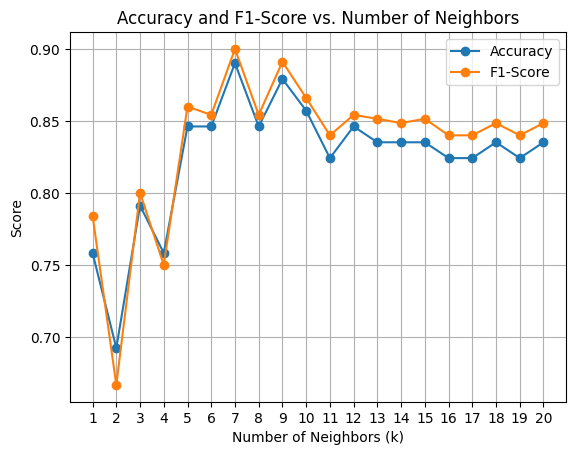

In [ ]:
# Plot the results
plt.plot(k_values, accuracy_scores, marker='o', label='Accuracy')
plt.plot(k_values, f1_scores, marker='o', label='F1-Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Accuracy and F1-Score vs. Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
k_best = 7  # Number of neighbors
index_best_k = k_best - 1
accuracy_best_k = accuracy_scores[index_best_k]
f1_best_k = f1_scores[index_best_k]

print("Accuracy when k =", k_best, ":", accuracy_best_k)
print("F1 Score when k =", k_best, ":", f1_best_k)

Accuracy when k = 7 : 0.8901098901098901
F1 Score when k = 7 : 0.9
